In [2]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=d34dde4be89c994098b7df96d0cd54a927551b20c51854d22864db9128104105
  Stored in directory: c:\users\ihamz\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


1/1 [==============================] - 1s 1s/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 347ms/step


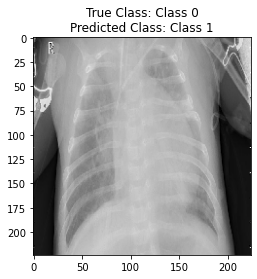

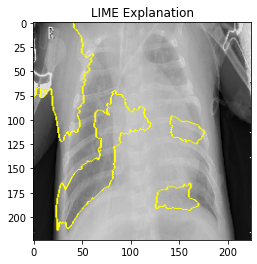

In [9]:
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the InceptionV3 model
backbone = InceptionV3(input_shape=(224, 224, 3), include_top=False)
model3 = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Load the trained weights
model3.load_weights("best_weights_inception.h5")

# Define the class labels
class_labels = {0: 'Class 0', 1: 'Class 1'}  # Update based on your binary classes

# Load an image for explanation
img_path = 'C:\\Users\\ihamz\\pneumonia_detection\\dataset\\chest_xray\\test\\PNEUMONIA\\person1_virus_7.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# Predict the class of the image - The image selected is of Pneumonia
true_class = 1
pred_proba = model3.predict(img_array)
predicted_class = 1 if pred_proba > 0.5 else 0

# LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], model3.predict, top_labels=1, num_samples=1000)

# Display the original image, true class, predicted class, and LIME explanation
plt.imshow(img)
plt.title(f"True Class: {class_labels[true_class]}\nPredicted Class: {class_labels[predicted_class]}")
plt.show()

# Display LIME explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title("LIME Explanation")
plt.show()
